<a href="https://colab.research.google.com/github/talentrics/HR_attrition_model/blob/main/Example_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Demonstration of Attrition Modeling using SciKit Learn**

**Daniel Macdonald** - HR Technology & Operations @ Double Verify 

My website: Talentrics - Workforce Science Made Simple  http://www.talentrics.com  

**Project description:** As director of HR Technology & Operations at an ad tech firm, I am working to build a people analytics function from scratch.  This worksheet is an example of how you might use some relatively basic data science techniques to evaluate employee turnover.  

**Potential Business Impact:** Some estimates of employee turnover are as much as 1.5x the employee salaries.  To be conservative, I calculated a 3 month cost due to loss of productivity and cost of new hire.

**Step by Step:** Data preparation, Data Exploration, Variable Selection, Model Development & Testing for predictive accuracy.  

**Some legalese:** all data in this example has been deliberately altered & any views expressed here are my own.  



#### **Step 1 - Data Preparation:**

- Data (pre-python) & import packages
- Import Data & initial data validation 


In [ ]:
# import required packages for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# import demo data set from my github page
url = 'https://raw.githubusercontent.com/talentrics/HR_attrition_model/main/Exit_analysis_demo.csv'
data = pd.read_csv(url) # convert the raw csv into a pandas dataframe
df = data.iloc[:,0:16]  #select only relevant rows with data

In [ ]:
# investigate the header row & first 5 rows of data
df.head()

,Terminated_,Geography,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12,Variable_13,Variable_14
0,0,1,0.139398,0,1,0.099925,0.042587,0.747512,0,0,1,0.006840,-0.003,1,0,0
1,1,1,0.041977,0,0,0.163642,0.389590,0.205224,0,0,0,0.007102,0.036,1,0,1
2,0,1,0.053152,0,1,0.130567,0.451104,0.711443,1,0,0,0.004145,-0.396,0,0,0
3,0,0,0.085530,1,1,0.103000,0.042587,0.067164,0,1,0,0.006586,-0.040,0,0,1
4,0,1,0.253725,1,1,0.102329,0.042587,0.369403,0,0,1,0.006828,-0.004,1,0,0


In [ ]:
df.shape # shape will show how many rows & columns of data you have

(414, 16)

In [ ]:
#look at counts of the dependant variable 'Terminated_' (1 = yes)
df['Terminated_'].value_counts()

0    349
1     65
Name: Terminated_, dtype: int64

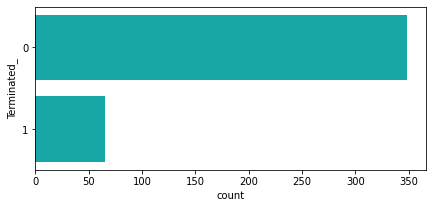

In [ ]:
# data validation - dependent variable split
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Terminated_", data=df, color="c")

#### **Step 2 - Data Exploration:**

- Some graphs to investigate distribution/correlation
- Objective: become familiar with the data quality

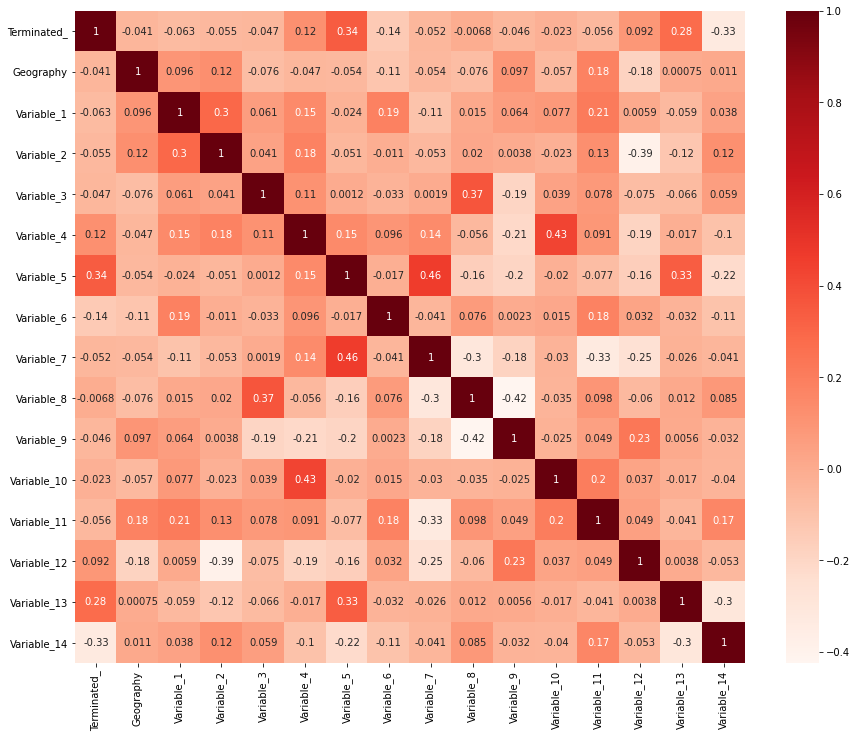

In [ ]:
#plot variable correlation
plt.figure(figsize=(15,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

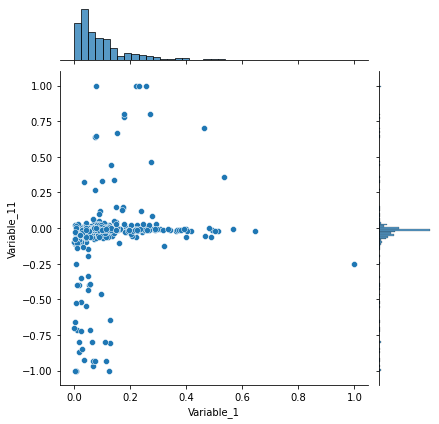

In [ ]:
# compare two variables against each other
sns.jointplot(x=df['Variable_1'], y=df['Variable_11'])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7126c18490>,)

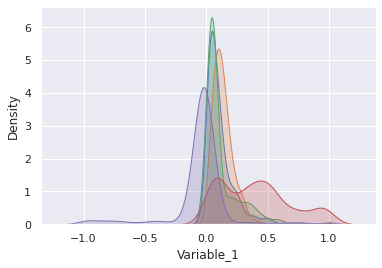

In [ ]:
# look at the distribution of continuous variables
sns.set(style="darkgrid")
sns.kdeplot(df['Variable_1'], shade=True),
sns.kdeplot(df['Variable_4'], shade=True),
sns.kdeplot(df['Variable_5'], shade=True),
sns.kdeplot(df['Variable_6'], shade=True),
#sns.kdeplot(df['Variable_10'], shade=True),
# Variable_10 removed to look at separately
sns.kdeplot(df['Variable_11'], shade=True),

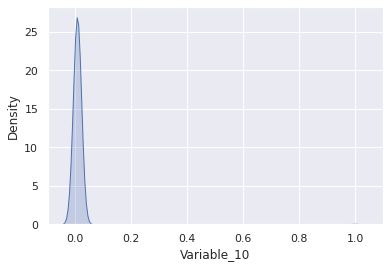

In [ ]:
# investigate Variable_10 distribution (very narrow & dense ~0)
sns.kdeplot(df['Variable_10'], shade=True)

####**Step 3 - Variable Selection**

- Data train test split for model development
- Initial modeling to evaluate variable importance.

#####**Sub 1 - Split Train Test Data Sets & Check**

In [ ]:
# create training and testing vars
y = df.Terminated_
X_ = df.iloc[:,1:16] # select columns aside from dependent variable
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(331, 15) (331,)
(83, 15) (83,)


In [ ]:
X_train.head() # look at the data

,Geography,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12,Variable_13,Variable_14
230,1,0.018052,0,0,0.013756,0.042587,0.067164,0,0,1,0.006504,-0.052,1,0,1
141,1,0.513467,1,0,0.231247,0.042587,0.976368,0,0,0,0.006712,-0.021,0,0,0
333,0,0.056877,0,0,0.062152,0.493691,0.793532,1,0,0,0.001959,-0.714,0,1,0
246,0,0.035100,0,0,0.127715,0.351735,0.554726,1,0,0,0.000508,-0.926,1,0,0
153,1,0.107307,1,0,0.076383,0.042587,0.067164,0,0,0,0.006705,-0.022,0,0,1


In [ ]:
# create object to plot the variable importance

def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    #plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

#####**Sub 2 - Find most important variables for Classification**

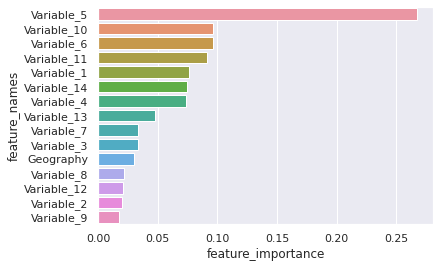

In [ ]:
# Build a forest and compute the impurity-based feature importances
forest_classifier = ExtraTreesClassifier(n_estimators=20,random_state=1)

# Build the first model using X & Y training data
forest_classifier.fit(X_train, y_train)

# use the object to evaluate the model variables
plot_feature_importance(forest_classifier.feature_importances_,X_train.columns,'RANDOM FOREST Classification ')

**Classification** - variable importance: 5, 10, 6 & 11

#####**Sub 3 - Find most important variables for Regression**

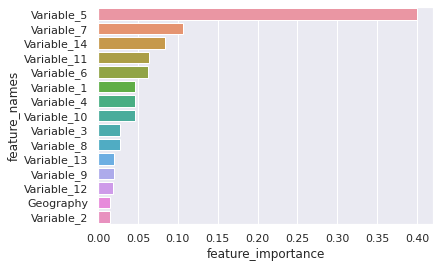

In [ ]:
forest_regressor = ExtraTreesRegressor(n_estimators=20,random_state=1)
forest_regressor.fit(X_train, y_train)

# use the object to evaluate the model variables
plot_feature_importance(forest_regressor.feature_importances_,X_train.columns,'RANDOM FOREST Regression ')

**Regression** - variable importance: 5, 7, 14, 11

#####**Sub 4 - Find most important variables for Gradient Boost Regressor**

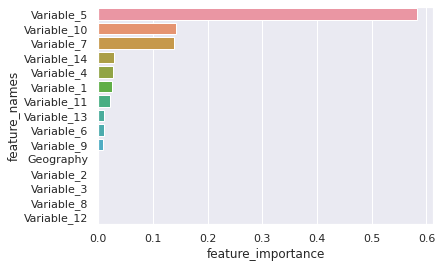

In [ ]:
# build Gradient Boosting Regressor and measure variable importance
GBregressor_ = GradientBoostingRegressor(n_estimators=20,random_state=1)
GBregressor_.fit(X_train,y_train)

# use the object to evaluate the model variables
plot_feature_importance(GBregressor_.feature_importances_,X_train.columns,'RANDOM FOREST GB Regression ')

GB Regression - variable importance: 5, 10, 7, 14

####**Step 4 - Model Development:**

- Using the selected variables build comparative models.
- Evaluating the performance of each model on test data. 

  1) Classification 2) Regression 3) Gradient Boost
  

#####**Model 1 - ExtraTreeClassifier (Development & Test)**

In [ ]:
X_train_2 = X_train[['Variable_5','Variable_6','Variable_10','Variable_11']]
X_test_2 = X_test[['Variable_5','Variable_6','Variable_10','Variable_11']]
X_train_2.head()

,Variable_5,Variable_6,Variable_10,Variable_11
230,0.042587,0.067164,0.006504,-0.052
141,0.042587,0.976368,0.006712,-0.021
333,0.493691,0.793532,0.001959,-0.714
246,0.351735,0.554726,0.000508,-0.926
153,0.042587,0.067164,0.006705,-0.022


In [ ]:
print (X_train_2.shape, y_train.shape)

(331, 4) (331,)


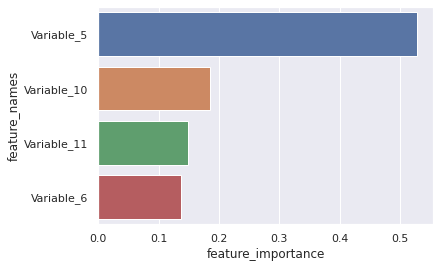

In [ ]:
# Build a forest and compute the impurity-based feature importances
forest_classifier2 = ExtraTreesClassifier(n_estimators=5,random_state=1)

forest_classifier2.fit(X_train_2, y_train)
plot_feature_importance(forest_classifier2.feature_importances_,X_train_2.columns,'RANDOM FOREST Classifier ')

In [ ]:
predict = forest_classifier2.predict(X_test_2)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predict)
cf_matrix

array([[64,  3],
       [ 7,  9]])

In [ ]:
# test accuracy (correct predictions/total)
from sklearn.metrics import classification_report
target_names = ['no Exit', 'Exited']
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

     no Exit       0.90      0.96      0.93        67
      Exited       0.75      0.56      0.64        16

    accuracy                           0.88        83
   macro avg       0.83      0.76      0.79        83
weighted avg       0.87      0.88      0.87        83



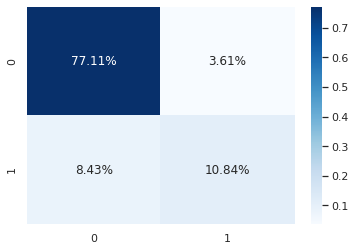

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#####**Model 2 - ExtraTreeRegressor (Development & Test)**

In [ ]:
X_train_3 = X_train[['Variable_5','Variable_7','Variable_14','Variable_11']]
X_test_3 = X_test[['Variable_5','Variable_7','Variable_14','Variable_11']]
X_train_3.head()

,Variable_5,Variable_7,Variable_14,Variable_11
230,0.042587,0,1,-0.052
141,0.042587,0,0,-0.021
333,0.493691,1,0,-0.714
246,0.351735,1,0,-0.926
153,0.042587,0,1,-0.022


In [ ]:
# Build a forest and compute the impurity-based feature importances
forest_regressor2 = ExtraTreesRegressor(n_estimators=20,random_state=1)

forest_regressor2.fit(X_train_3, y_train)

predict2 = forest_regressor2.predict(X_test_3)
predict2_ = np.where(predict2<.5,0,1)
predict2_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
cf_matrix2 = confusion_matrix(y_test, predict2_)
cf_matrix2

array([[66,  1],
       [ 6, 10]])

In [ ]:
print(classification_report(y_test, predict2_, target_names=target_names))

              precision    recall  f1-score   support

     no Exit       0.92      0.99      0.95        67
      Exited       0.91      0.62      0.74        16

    accuracy                           0.92        83
   macro avg       0.91      0.81      0.85        83
weighted avg       0.92      0.92      0.91        83



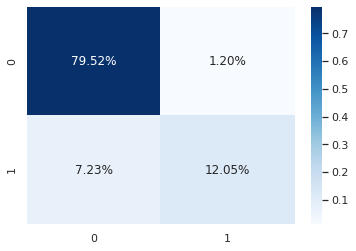

In [ ]:
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, 
            fmt='.2%', cmap='Blues')

#####**Model 3 - GBRegressor (Development & Test)**

In [ ]:
X_train_GB = X_train[['Variable_5','Variable_7','Variable_14','Variable_10']]
X_test_GB = X_test[['Variable_5','Variable_7','Variable_14','Variable_10']]
X_train_GB.head()

,Variable_5,Variable_7,Variable_14,Variable_10
230,0.042587,0,1,0.006504
141,0.042587,0,0,0.006712
333,0.493691,1,0,0.001959
246,0.351735,1,0,0.000508
153,0.042587,0,1,0.006705


In [ ]:
# Build a forest and compute the impurity-based feature importances
GBregressor2_ = GradientBoostingRegressor(n_estimators=5,random_state=1)

GBregressor2_.fit(X_train_GB, y_train)
predict3 = GBregressor2_.predict(X_test_GB)
predict3

array([0.08741393, 0.28717792, 0.08741393, 0.08741393, 0.08741393,
       0.08741393, 0.08741393, 0.1108145 , 0.08741393, 0.08741393,
       0.28717792, 0.1108145 , 0.28717792, 0.08741393, 0.28717792,
       0.1108145 , 0.39184659, 0.08741393, 0.08741393, 0.1108145 ,
       0.08741393, 0.08741393, 0.28717792, 0.08741393, 0.39184659,
       0.08741393, 0.08741393, 0.08741393, 0.08741393, 0.08741393,
       0.39184659, 0.08741393, 0.08741393, 0.08741393, 0.08741393,
       0.08741393, 0.08741393, 0.28717792, 0.28717792, 0.08741393,
       0.08741393, 0.1108145 , 0.08741393, 0.28717792, 0.08741393,
       0.39184659, 0.28717792, 0.08741393, 0.08741393, 0.39184659,
       0.08741393, 0.08741393, 0.08741393, 0.08741393, 0.49692393,
       0.28717792, 0.08741393, 0.08741393, 0.08741393, 0.08741393,
       0.08741393, 0.08741393, 0.08741393, 0.08741393, 0.1108145 ,
       0.08741393, 0.08741393, 0.1108145 , 0.08741393, 0.08741393,
       0.08741393, 0.08741393, 0.08741393, 0.08741393, 0.11081

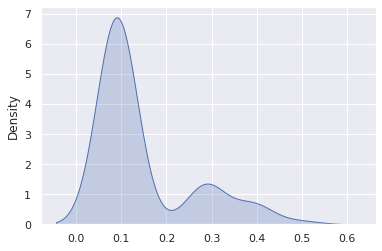

In [ ]:
# investigate Variable_10 distribution (very narrow & dense ~0)
sns.kdeplot(predict3, shade=True)

In [ ]:
predict3_ = np.where(predict3<.2,0,1)

cf_matrix3 = confusion_matrix(y_test, predict3_)
cf_matrix3

array([[62,  5],
       [ 2, 14]])

In [ ]:
print(classification_report(y_test, predict3_, target_names=target_names))

              precision    recall  f1-score   support

     no Exit       0.97      0.93      0.95        67
      Exited       0.74      0.88      0.80        16

    accuracy                           0.92        83
   macro avg       0.85      0.90      0.87        83
weighted avg       0.92      0.92      0.92        83



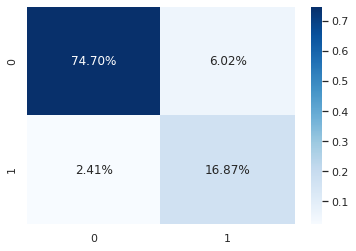

In [ ]:
sns.heatmap(cf_matrix3/np.sum(cf_matrix3), annot=True, 
            fmt='.2%', cmap='Blues')

#### **Decision**

Although there are additional techniques and approaches to explore within the model development.  In the end, we do not want to aim for 100% accuracy.  The second model, using a **GB Regression (model 3)** performs better than the Classification & Regression models (1 & 2) 

**The GB model accuracy measure is 92%**, and it does not seem to give up too much in terms of precision/recall performance.